# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('/Users/katialopes-gilbert/Downloads/Frequentist Case Study/insurance2.csv')

In [130]:
medical.shape

(1338, 8)

In [131]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

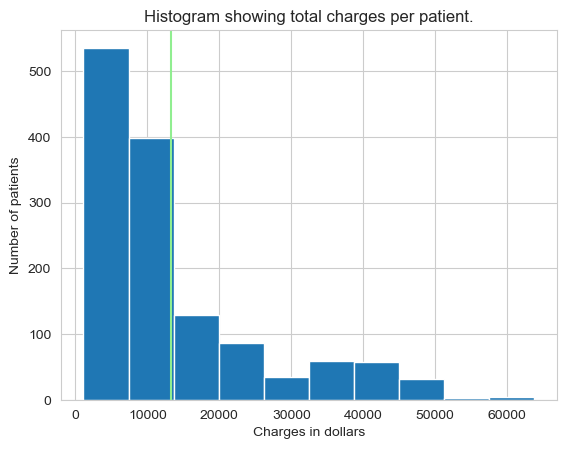

In [132]:
_ = plt.hist(data=medical, x='charges')
_ = plt.xlabel('Charges in dollars')
_ = plt.ylabel('Number of patients')
_ = plt.axvline(x=medical.charges.mean(), color='lightgreen')
_ = plt.title('Histogram showing total charges per patient.')

In [133]:
print('The mean of the data is: ', medical.charges.mean())
print('The standard deviation of the data is: ', medical.charges.std())

The mean of the data is:  13270.422265141257
The standard deviation of the data is:  12110.011236693996


The mean is of the medical charges is 13,270 with a standard deviation of 12,110. The histogram shows that the data is skewed to the left, with several hundred patients having charges well over 20,000. Because of the outliers, the mean and standard deviation of the sample may affected. 

One way to understand the variability within the sample would be to boostrap the data and create a sampling distribution. This would enable a deeper understanding of the sample since it is not normally distributed, and it is unknown if the population data is normally distributed. Additionally, bootstrapping can provide more accurate confidence intervals for statistics like the mean, median and variance. 

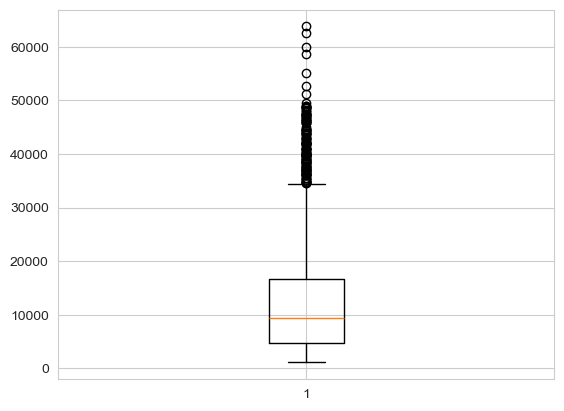

In [134]:
_ = plt.boxplot(data=medical, x='charges')

In [135]:
medical.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

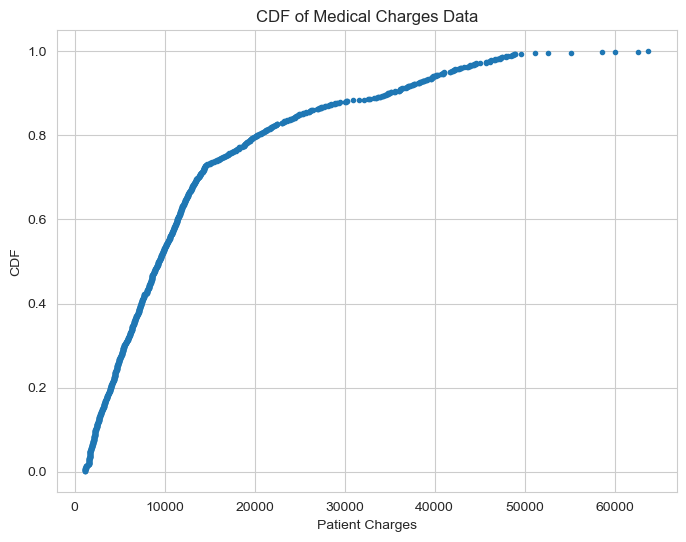

In [136]:
sorted_mean_charges = np.sort(medical['charges'])

# Calculate the CDF values
sample_cdf = np.arange(1, len(sorted_mean_charges) + 1) / len(sorted_mean_charges)

# Plot the CDF
_ = plt.figure(figsize=(8, 6))
_ = plt.plot(sorted_mean_charges, sample_cdf, marker='.', linestyle='none')
_ = plt.title('CDF of Medical Charges Data')
_ = plt.xlabel('Patient Charges')
_ = plt.ylabel('CDF')
_ = plt.grid(True)
_ = plt.show()

Further analysis shows that 50% of the data lie between 4,740 and 16,639 with the median at 9,382. 

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

In order to answer this question, I will conduct a one-sided t-test to test a null hypothesis of the average charge being 12,000. 

I will also bootstrap the data to get a better understanding of the variability of the mean and standard deviation since the data does not follow a normal distribution. 

In [137]:
np.random.seed(47)

In [138]:
def create_sampling_dist(df, col, n=1):
    """Create a sampling distribution for dataframe df for n number of trials.
    
    Parameters:
    
    """
    bootstrap = [df[col].sample(len(df), replace=True).mean() for i in range(n)]
    bootstrap_df = pd.DataFrame({'means': bootstrap})
    return bootstrap_df

In [139]:
sampling_dist = create_sampling_dist(medical, 'charges', 10000)

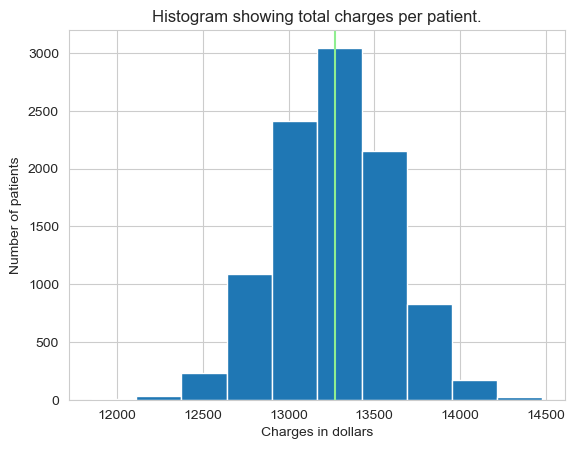

In [140]:
_ = plt.hist(sampling_dist)
_ = plt.xlabel('Charges in dollars')
_ = plt.ylabel('Number of patients')
_ = plt.axvline(x=medical.charges.mean(), color='lightgreen')
_ = plt.title('Histogram showing total charges per patient.')

In [141]:
sampling_dist.describe()

,means
count,10000.000000
mean,13268.292567
std,332.010570
min,11848.757137
25%,13043.414825
50%,13270.119707
75%,13493.176390
max,14479.369348


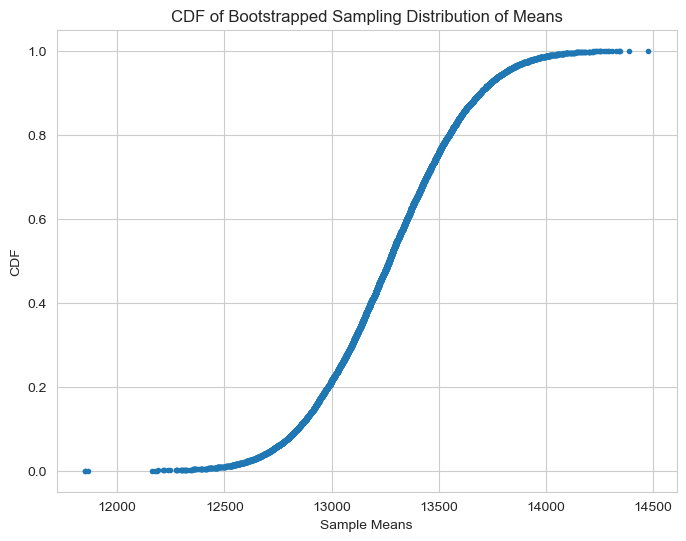

In [142]:
sorted_bootstrap_means = np.sort(sampling_dist['means'])

# Calculate the CDF values
bootstrap_cdf = np.arange(1, len(sorted_bootstrap_means) + 1) / len(sorted_bootstrap_means)

# Plot the CDF
_ = plt.figure(figsize=(8, 6))
_ = plt.plot(sorted_bootstrap_means, bootstrap_cdf, marker='.', linestyle='none')
_ = plt.title('CDF of Bootstrapped Sampling Distribution of Means')
_ = plt.xlabel('Sample Means')
_ = plt.ylabel('CDF')
_ = plt.grid(True)
_ = plt.show()

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

Given the nature of the concern, a one-sided t-test is most appropriate because the administrator is only concerned about the mean changes dropping below the 12,000 threshold. We want to test whether the true mean is lower than the $12,000 threshold. I will use a t-test because the actual population standard deviation is unknown. 

The null hypothesis is that the mean charge is 12,000. The alternative hypothesis is that the mean is less than 12,000. 

In [143]:
# identify mean, std, pop_mean and sample size for the t-test
mean = medical['charges'].mean()
standard_dev = medical['charges'].std(ddof=1)
population_mean = 12000
sample_size = len(medical)

# calculate t-statistic
t_statistic = (mean - population_mean) / (standard_dev/np.sqrt(sample_size))

# calculate p-value
p_value = t.cdf(t_statistic, df=sample_size-1)

In [144]:
print(f"t-statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

t-statistic: 3.8374
P-Value: 0.9999


In [145]:
# determine confidence intervals
ci_lower = np.percentile(sampling_dist['means'], 2.5)
ci_upper = np.percentile(sampling_dist['means'], 97.5)

print(ci_lower.round(), ci_upper.round())

12625.0 13918.0


**Summary**

The result of the t-test yielded a p-value of 0.9999, so we fail to reject the null hypothesis that the average hospital charge is 12,000 because p > 0.05. 

After creating a sampling distribution of the data by resampling with replacement 10,000 times, there is 95% confidence that the true mean is between 12,619 to 13,919. Since the entire confidence interval is above 12,000, it suggests that the true mean is not likely to be below 12,000. 

These findings suggest that the true average charge is above the 12,000 threshold. 

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:


\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}


and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}


(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

**Hypothesis**

The null hypothesis is that people with insurance are not charged a different amount to those without insurance.
The althernative hypothesis is that people with insurance are charged a different amount to those without insurance. 

**Assumptions about variance**

Since we are conducting a pooled standard deviation test for the two groups, we are assuming that the variance is the same for both groups.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

I first want to take a look at the data to see the mean change by insurance claim.

In [146]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [155]:
charges_by_insurance = medical.groupby('insuranceclaim')['charges'].mean().reset_index()
charges_by_insurance

,insuranceclaim,charges
0,0,8821.421892
1,1,16423.928277


In [149]:
charges_by_insurance = medical.groupby('insuranceclaim').agg({'charges':['mean', 'count']}).round()
charges_by_insurance

charges      
                   mean count
insuranceclaim               
0                8821.0   555
1               16424.0   783

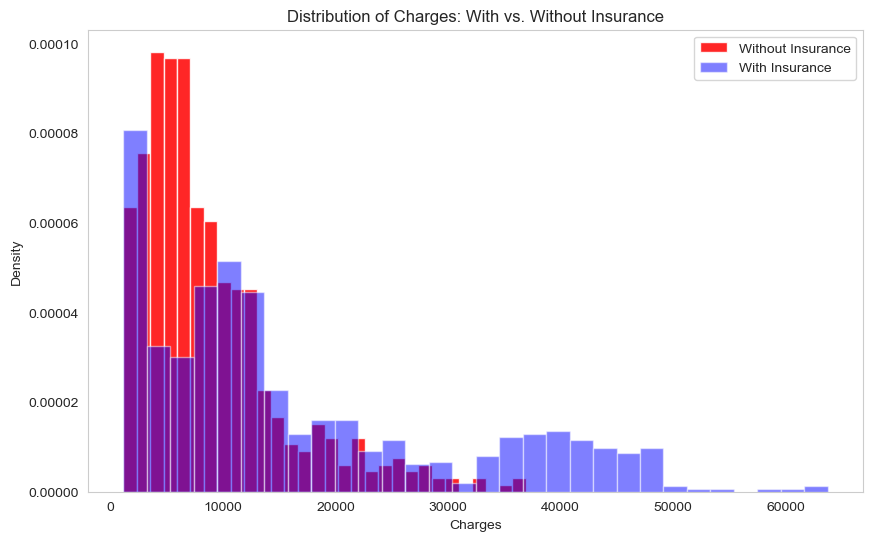

In [151]:
plt.figure(figsize=(10, 6))
plt.hist(data= medical.query('insuranceclaim == 0'), x='charges', bins=30, color='red', alpha=0.85, density=True, label='Without Insurance')
plt.hist(data=medical.query('insuranceclaim == 1'), x='charges', bins=30, color='blue', alpha=0.5, density=True, label='With Insurance')

# Add labels and legend
plt.xlabel('Charges')
plt.ylabel('Density')
plt.title('Distribution of Charges: With vs. Without Insurance')
plt.legend()
plt.grid(False)
plt.show()

/Users/katialopes-gilbert/opt/anaconda3/envs/data-course/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


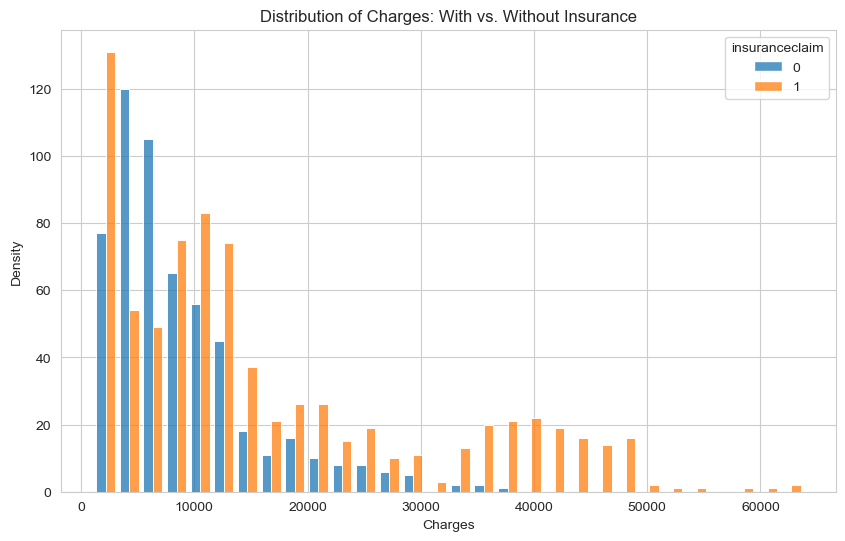

In [153]:
import seaborn as sns 

# Plot histograms with dodging
plt.figure(figsize=(10, 6))
sns.histplot(data=medical, x='charges', hue='insuranceclaim', bins=30, multiple='dodge', shrink=0.8, legend=True)

# Add labels and legend
plt.xlabel('Charges')
plt.ylabel('Density')
plt.title('Distribution of Charges: With vs. Without Insurance')
plt.grid(True)
plt.show()

It does appear that people with insurance are charged more on average than people without insurance. I will conduct a t-test to test the hypothesis.

In [156]:
# subset the data
no_insurance = medical.query('insuranceclaim == 0')
insurance = medical.query('insuranceclaim == 1')

# find n for insurance and no insurance
n_no_insurance = len(no_insurance)
n_insurance = len(insurance)

# find the mean for each dataset
no_insurance_mean = no_insurance['charges'].mean()
insurance_mean = insurance['charges'].mean()

# find the standard deviation for each dataset
no_insurance_std = no_insurance['charges'].std(ddof=1)
insurance_std = insurance['charges'].std(ddof=1)

In [168]:
# calculate the pooled standard deviation
s_p = np.sqrt(((n_no_insurance -1) * no_insurance_std**2 + (n_insurance -1) * insurance_std**2) / (n_no_insurance + n_insurance -2))

# calculate the t-statistic
t_statistic = (no_insurance_mean - insurance_mean) / (s_p * np.sqrt((1/n_no_insurance) + 1/(n_insurance)))

# calcuate the p-value
p_value = 2 * t.cdf(-abs(t_statistic), df=(n_no_insurance + n_insurance - 2))

In [172]:
print(f"t-statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.10f}")

t-statistic: -11.8933
P-Value: 0.0000000000


In [171]:
from scipy.stats import ttest_ind

t_stat = ttest_ind(no_insurance['charges'], insurance['charges'], equal_var=True)

print(t_stat)

TtestResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31, df=1336.0)


We see that the results of calculating the t-test manually and using the `scipy.stats.ttest_ind()` result in the same t-statistic and p-values.

Given the result of p < 0.05, we can reject the null hypothesis that insured and uninsured patients are charged the same amounts. The althernate hypothesis must therefore be correct in that people with insurance are charged a different amount to those without insurance.

Additionally, from scipy.stats.ttest_ind() documentation, it states that if the t-statistic is negative, then the mean for the 1st sample(patients without insurance) is less than the mean of the second sample (patients with insurance).

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

`scipy.stats` does not appear to have a ztest function, however, we can use `statsmodels.stats.weightstats.ztest` to compute the z-statistic and then associated p-value.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test